In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
df = pd.read_feather('data/oahu.feather', nthreads=16)

In [3]:
info = pd.read_csv('data/info.csv')

In [4]:
df.columns

Index(['Date', 'Seconds', 'Year', 'DOY', 'HST', 'GH_DH3', 'GH_DH4', 'GH_DH5',
       'GH_DH10', 'GH_DH11', 'GH_DH9', 'GH_DH2', 'GH_DH1', 'GT_DH1', 'GH_AP6',
       'GT_AP6', 'GH_AP1', 'GH_AP3', 'GH_AP5', 'GH_AP4', 'GH_AP7', 'GH_DH6',
       'GH_DH7', 'GH_DH8', 'Datetime'],
      dtype='object')

In [5]:
info

,Location,Pakbus,Latitude,Longitude,Sensor,CF
0,DHHL_3,201,21.31236,-158.08463,PY66499,141.76
1,DHHL_4,202,21.31303,-158.08505,PY66500,118.01
2,DHHL_5,203,21.31357,-158.08424,PY66501,104.46
3,DHHL_10,204,21.31183,-158.08554,PY66502,109.06
4,DHHL_11,205,21.31042,-158.08530,PY66503,114.71
5,DHHL_9,206,21.31268,-158.08688,PY66504,141.92
6,DHHL_2,207,21.31451,-158.08534,PY66505,106.39
7,DHHL_1,208,21.31533,-158.08700,PY66519,107.34
8,AP_6,209,21.30812,-158.07935,PY66521,117.34
9,AP_1,210,21.31276,-158.08389,PY66523,110.40


In [6]:
df.describe()

,Seconds,Year,DOY,HST,GH_DH3,GH_DH4,GH_DH5,GH_DH10,GH_DH11,GH_DH9,...,GH_AP6,GT_AP6,GH_AP1,GH_AP3,GH_AP5,GH_AP4,GH_AP7,GH_DH6,GH_DH7,GH_DH8
count,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,...,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07
mean,2.949945e+01,2.010513e+03,1.858836e+02,1.229514e+03,2.078589e+02,2.012375e+02,2.051705e+02,2.055484e+02,2.022586e+02,2.059909e+02,...,3.763285e+02,3.090993e+02,3.137456e+02,-3.127578e+04,3.744299e+02,3.707667e+02,2.693240e+02,2.058194e+02,2.072241e+02,2.020341e+02
std,1.731841e+01,4.998400e-01,9.226219e+01,4.324050e+02,4.134423e+03,4.133063e+03,4.133597e+03,4.133466e+03,4.133159e+03,4.134343e+03,...,3.559355e+02,3.367872e+02,2.395721e+03,4.663147e+04,3.551335e+02,3.487763e+02,3.287228e+03,4.133613e+03,4.133807e+03,4.133188e+03
min,0.000000e+00,2.010000e+03,1.000000e+00,5.000000e+02,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04,...,-3.903160e-01,-3.641710e-01,-9.999900e+04,-9.999900e+04,0.000000e+00,-3.587210e-01,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04
25%,1.400000e+01,2.010000e+03,1.130000e+02,8.450000e+02,3.585280e+01,3.926890e+01,3.919680e+01,4.040690e+01,3.781860e+01,3.493940e+01,...,4.057890e+01,3.422060e+01,4.073970e+01,-9.999900e+04,4.054130e+01,4.087510e+01,3.739830e+01,3.879600e+01,3.974750e+01,3.918830e+01
50%,2.900000e+01,2.011000e+03,1.870000e+02,1.230000e+03,2.745670e+02,2.766120e+02,2.786700e+02,2.815790e+02,2.783340e+02,2.710140e+02,...,2.825530e+02,1.752650e+02,2.790020e+02,4.755150e+01,2.798900e+02,2.805950e+02,2.796300e+02,2.802770e+02,2.804950e+02,2.769610e+02
75%,4.400000e+01,2.011000e+03,2.610000e+02,1.615000e+03,6.352530e+02,6.240600e+02,6.310440e+02,6.315050e+02,6.254170e+02,6.332350e+02,...,6.343040e+02,5.117000e+02,6.234180e+02,4.261850e+02,6.300870e+02,6.254420e+02,6.341130e+02,6.326570e+02,6.349530e+02,6.250400e+02
max,5.900000e+01,2.011000e+03,3.650000e+02,2.000000e+03,1.776870e+03,1.700350e+03,1.679110e+03,1.683540e+03,1.671920e+03,1.774320e+03,...,1.688870e+03,1.599200e+03,1.637120e+03,1.729710e+03,1.684510e+03,1.673730e+03,1.743300e+03,1.695660e+03,1.695750e+03,1.689960e+03


In [7]:
df.shape

(32022593, 25)

In [8]:
sensors = ['GH_DH3', 'GH_DH4', 'GH_DH5',
       'GH_DH10', 'GH_DH11', 'GH_DH9', 'GH_DH2', 'GH_DH1', 'GT_DH1', 'GH_AP6',
       'GT_AP6', 'GH_AP1', 'GH_AP3', 'GH_AP5', 'GH_AP4', 'GH_AP7', 'GH_DH6',
       'GH_DH7', 'GH_DH8']

#df[df[sensors] < 0]

In [9]:
df_ = df.iloc[:10000]

In [27]:
df_ = df
del df

In [28]:
df_ = df_.replace(-99999.000000, np.nan)

In [16]:
from bokeh.layouts import gridplot
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT

In [29]:
p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Sensor'

for i in range(len(sensors)):
    p1.line(datetime(df_['Datetime']), df_[sensors[i]])
p1.legend.location = "top_left"

/home/victor/miniconda3/lib/python3.6/site-packages/bokeh/models/plots.py:725: UserWarning: 
You are attemptings to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [26]:
show(p1)

output_file("image.html", title="image.py example")


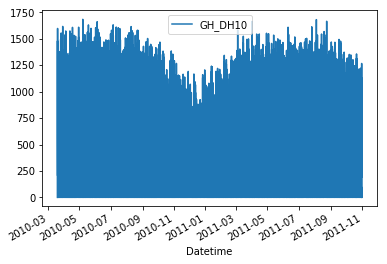

In [10]:
df[df["GH_DH10"]>0].plot(x='Datetime', y='GH_DH10')

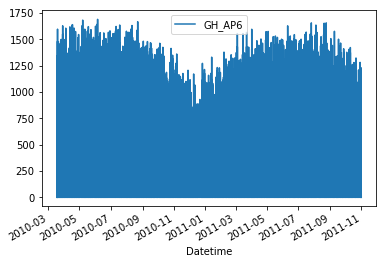

In [11]:
df[df["GH_AP6"]>0].plot(x='Datetime', y='GH_AP6')

In [10]:
df_ = df.replace(-99999.000000, np.nan)

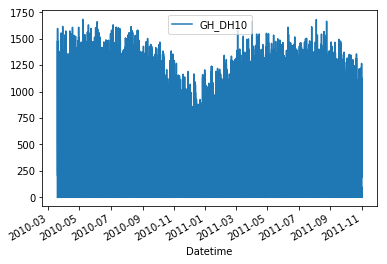

In [13]:
df_.plot(x='Datetime', y='GH_DH10')

In [14]:
dfs = df_.iloc[:10000]

In [18]:
import seaborn as sns

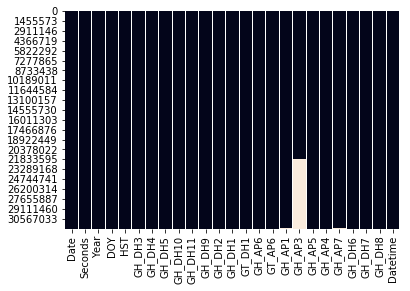

In [27]:
sns.heatmap(df_.isnull(), cbar=False)

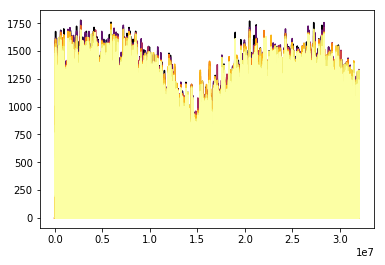

In [28]:
df_[sensors].plot(legend=False, colormap='inferno')

## Minute Data

In [47]:
df_min = df[df.Datetime.dt.second == 0]

## Hour Data

In [49]:
df_hour = df_min[df_min.Datetime.dt.minute == 0]

In [52]:
df_hour_ = df_hour.replace(-99999.000000, np.nan)

In [ ]:
df_hour_[sensors].plot(legend=False, colormap='inferno')